In [1]:
import cv2
import pandas as pd

# 이미지 불러오기
imgpath = "../images/two.jpg"
img = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)

# 세로, 가로, 채널 수
imgData = pd.DataFrame(img)
imgData.to_csv("./img_data.csv", index=False)

# 1. OpenCV 활용 이미지 조작 실습

### (1) 이미지 불러오기/저장하기

In [2]:
import cv2 

# 이미지 불러오기
imgpath = "../images/sparkkorea.jpg" 
img = cv2.imread(imgpath, cv2.IMREAD_COLOR)

# 세로, 가로, 채널 수
print(img.shape)

# 이미지 저장하기 
cv2.imwrite("./sparkkorea_out.jpg", img)

(284, 586, 3)


True

### (2) 이미지 시각화 하기

In [4]:
import cv2

# cv2 라이브러리 활용 
cv2.imshow("window titile", img)
# 키입력 무제한 기다림
inputKey = cv2.waitKey(0) 
cv2.destroyAllWindows()

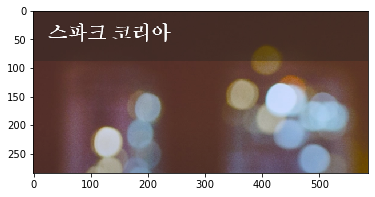

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

# matplotlib 라이브러리 활용
plt.imshow(img)

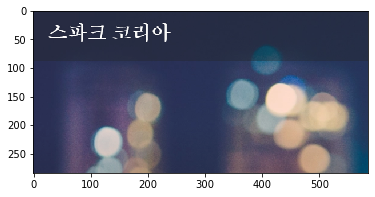

In [7]:
b,g,r = cv2.split(img)

matimg = cv2.merge( [r,g,b] )

plt.imshow(matimg)

In [14]:
# inputKey = cv2.waitKey(0)
# if inputKey == 27: # esc
#         cv2.destroyAllWindows()
# elif inputKey == 26: # ctrl + z
#     cv2.imwrite('./img_copy.jpg',img)
#     cv2.destroyAllWindows()
# else:
#     cv2.destroyAllWindows()

### (3) 이미지 색상 변경

In [7]:
# 이미지 확인용
def imgshow(inImage): 
    cv2.imshow("target images", inImage)
    inputKey = cv2.waitKey(0)
    cv2.destroyAllWindows()

# BRG2RGB
rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
print(rgbImg.shape)
imgshow(rgbImg)

# COLOR TO GRAY
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
print(grayImg.shape)
imgshow(grayImg)

(284, 586, 3)
(284, 586)


### (4) 이미지 사이즈 변경

In [10]:
# 이미지 확인용
def imgshow(inImage1,inImage2):
    cv2.imshow("target images", inImage1)
    cv2.imshow("target images2", inImage2)
    inputKey = cv2.waitKey(0)
    cv2.destroyAllWindows()

In [11]:
# 이미지 사이즈 조절
IMG_W = 300
IMG_H = 100
resizeImg = cv2.resize(img, (IMG_W, IMG_H)) 
print(resizeImg.shape) 
imgshow(img, resizeImg)

(100, 300, 3)


### (5) 이미지 제어 종합 실습

In [12]:
import cv2

def showImage(imgPath):

    # 이미지 불러오기
    img = cv2.imread(imgPath, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(src=gray, dsize=(400, 200))
    cv2.imshow("sparkkorea", gray)

    # 키보드 입력 대시 (0: 무한대기, 이외 밀리세컨드)
    inputKey = cv2.waitKey(0) --- (2)
    if inputKey == 27: # esc
        cv2.destroyAllWindows()
    elif inputKey == 26: # ctrl + z
        cv2.imwrite("./sparkkorea_out.jpg", gray)
        cv2.destroyAllWindows()
    else:
        cv2.destroyAllWindows()
    print(inputKey)
imgPath = "../images/sparkkorea.jpg"
showImage(imgPath)

25


### (6) 이미지에 Drawing 적용 (사각형)

In [15]:
# 이미지 불러오기 및 크기 조절
sampleImg = cv2.imread("../images/sparkkorea.jpg")
# 이미지 사이즈 변경
resizedImg = cv2.resize(src=sampleImg, dsize=(256,256))

In [16]:
# 불러온 이미지 내 사각형 그리기
cv2.rectangle( resizedImg,   
             (80, 50),
             (180,150),
             (0,255,255),
             3)

cv2.imshow("rectImage", resizedImg)

inputKey = cv2.waitKey(0)
cv2.destroyAllWindows()

### (6) 이미지에 Drawing 적용 (글자)

In [17]:
# 이미지 불러오기 및 크기 조절
sampleImg = cv2.imread("../images/sparkkorea.jpg")
# 이미지 사이즈 변경
resizedImg = cv2.resize(src=sampleImg, dsize=(256,256))

In [18]:
# 불러온 이미지 내 사각형 그리기
cv2.putText( resizedImg,   
            "spark",
            (80, 80),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0,255,255),
            2)

cv2.imshow("textImage", resizedImg)
inputKey = cv2.waitKey(0)
cv2.destroyAllWindows()

# 2. OpenCV 활용 영상 조작 실습

### (1) 영상 불러오기

In [20]:
import cv2
cap = cv2.VideoCapture("../images/sample_video.mp4")


In [24]:
# 반복해서 프레임 표시
while (cap.isOpened):
    ret, frame = cap.read() 
    
    if ret:
        cv2.imshow("video", frame)
        
        # 33ms 30fps = 1000ms/30frame -> 1000/30 = 33
        inputKey = cv2.waitKey(33) 
        if inputKey == 27: 
            break
    else:
        break
# 영상 닫기
cap.release()
cv2.destroyAllWindows()


# 2. 영상 저장하기

In [25]:
import cv2

cap = cv2.VideoCapture("../images/sample_video.mp4") 

width, height = int(cap.get(3)), int(cap.get(4)) 
fcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter("./output.mp4", fcc, 30, (width,height)) 
while (cap.isOpened):
    
    ret, frame = cap.read()
    cv2.imshow("video", frame)
    # 비디오 저장
    video.write(frame) 
    inputKey = cv2.waitKey(33)
    if inputKey == 27: # ESC키 종료
        break     
video.release()
cap.release()
cv2.destroyAllWindows()

### 3-1 영상저장 실습

In [3]:
import cv2

cap = cv2.VideoCapture("../images/sample_video.mp4")
fcc = cv2.VideoWriter_fourcc(*'mp4v')
width = int(cap.get(3))
height = int(cap.get(4))
video = cv2.VideoWriter("./output.mp4", fcc, 30, (width,height))

record=False
while (cap.isOpened):
    
    ret, frame = cap.read()
    
    cv2.imshow("video", frame)

    # 33ms 30fps = 1000ms/30frame -> 1000/30 = 33
    inputKey = cv2.waitKey(33)

    if inputKey == 27: # ESC 키
        break
    elif inputKey == 24: # ctrl+x # 비디오 녹화
        record = True
    elif inputKey == 3: # ctrl+c # 일시정지
        record = False
    else: 
        pass
        
    ## 녹화 버튼을 눌렀으면 프레임 녹화
    if record == True:
        video.write(frame)
    # 일시정지 버튼 누른 경우 녹화 안함
    else:
        pass
        
    
video.release()
cap.release()
cv2.destroyAllWindows()


In [4]:
# import cv2
# cap = cv2.VideoCapture("../images/sample_video.mp4")
# fcc = cv2.VideoWriter_fourcc('D','I','V','X')
# width = int(cap.get(3))
# height = int(cap.get(4))
# while (cap.isOpened):
#     ret, frame = cap.read()
    
#     cv2.imshow("video", frame)

#     # 33ms 30fps = 1000ms/30frame -> 1000/30 = 33
#     inputKey = cv2.waitKey(33)

#     if inputKey == 27:
#         break
#     elif inputKey == 24: # ctrl+x
#         video = cv2.VideoWriter("./video_out.avi",
#         fcc,
#         30,(width,height) )
#     else:
#         video.write(frame)
    
# video.release()
# cap.release()
# cv2.destroyAllWindows()


### (3) 영상 이미지 캡쳐

In [8]:
import cv2
cap = cv2.VideoCapture("../images/sample_video.mp4")
while (cap.isOpened):
    ret, frame = cap.read()
    cv2.imshow("video", frame)
    inputKey = cv2.waitKey(33)
    if inputKey == 27:
        break
    elif inputKey == 26: # ctrl+z
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (800, 500))
        textValue = "smile"
        cv2.putText(gray, textValue, (40,100), cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,255),2)
        cv2.imwrite("./img_out.jpg", gray)
    else:
        pass
 
cap.release()
cv2.destroyAllWindows()

In [6]:
cap = cv2.VideoCapture("../images/sample_video.mp4")
fcc = cv2.VideoWriter_fourcc('D','I','V','X')
width, height = int(cap.get(3)), int(cap.get(4))
while (cap.isOpened):
    ret, frame = cap.read()
    cv2.imshow("video", frame)
    inputKey = cv2.waitKey(33)
    if inputKey == 27:
        break
    elif inputKey == 26: # ctrl+z
        cv2.imwrite("./im_out.jpg", frame)
    else:
        pass
 
cap.release()
cv2.destroyAllWindows()


### (4) 종합 실습

In [2]:
import datetime
import cv2

#capture = cv2.VideoCapture(0)
capture = cv2.VideoCapture("../images/sample_video.mp4")
fcc = cv2.VideoWriter_fourcc('D','I','V','X')
record = False

width = int(capture.get(3))
height = int(capture.get(4))

# 캡쳐 로직 (우측 참조)
while (capture.isOpened):
    ret, frame = capture.read()
    if ret == False:
        break
    cv2.imshow("VideoFrame", frame)

    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    key = cv2.waitKey(33)#1) & 0xFF

    if key == 27: # esc 종료
        break
    elif key == 26:   # ctrl + z
        print("캡쳐")
        cv2.imwrite("./" + str(now) + ".png", frame)

    elif key == 24:  # ctrl + x
        print("녹화 시작")
        record = True
        outfps = 30
        video = cv2.VideoWriter("./" + str(now) + ".avi", 
                                fcc, # 프레임 압축코드
                                outfps, 
                                (width, height))
    elif key == 3:
        print("녹화 중지") # ctrl + c
        record = False
        video.release()
    
    if record == True:
        print("녹화 중..")
        video.write(frame)

capture.release()
cv2.destroyAllWindows()


녹화 시작
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..


### [실습]
비디오 영상 일부를
Gray 컬러로 캡쳐하여 저장하세요
추가로 사이즈를 256*256으로 변경!

In [17]:
import datetime
import cv2

#capture = cv2.VideoCapture(0)
capture = cv2.VideoCapture("../images/image_sample.mp4")
fcc = cv2.VideoWriter_fourcc('D','I','V','X')
# fcc = cv2.VideoWriter_fourcc(*'XVID')
record = False

frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

while (capture.isOpened):
    ret, frame = capture.read()
    if ret == False:
        break
    cv2.imshow("VideoFrame", frame)

    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    key = cv2.waitKey(33)#1) & 0xFF
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if key == 27: # esc 종료
        break
    elif key == 26:   # ctrl + z
        print("캡쳐")
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(gray)
        cv2.imwrite("./" + str(now) + ".png", gray)

    elif key == 24:  # ctrl + x
        print("녹화 시작")
        record = True
        outfps = 30
#         video = cv2.VideoWriter(filename="./" + str(now) + ".avi", 
#                                 fourcc = fcc, # 프레임 압축코드
#                                 fps=outfps, 
#                                 frameSize= (frame_width, frame_height), isColor=False)
        video = cv2.VideoWriter("./" + str(now) + ".avi",
                       fcc,
                        20,
                        (frame_width,frame_height),
                        0
                       )
        
    elif key == 3:
        print("녹화 중지") # ctrl + c
        record = False
        video.release()
    
    if record == True:
        print("녹화 중.. 가로:"+str(frame_width)+"세로:"+str(frame_height))
        video.write(gray)

capture.release()
cv2.destroyAllWindows()


캡쳐
[[16 16 16 ...  5  5  5]
 [16 16 16 ...  5  5  5]
 [16 16 16 ...  5  5  5]
 ...
 [12 12 12 ... 15 15 15]
 [12 12 12 ... 15 15 15]
 [12 12 12 ... 15 15 15]]
녹화 시작
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중.. 가로:1920세로:1080
녹화 중지


### [실습]
자유롭게 동영상을 웹캠을 통해
저장해보세요.